In [9]:
import numpy as np 
from sklearn.decomposition import PCA
import pandas as pd 


In [2]:
f = "../../ml2023/data_labeled.csv"
df = pd.read_csv(f, header=0)

In [5]:

df.head()


,Acin1,Actb,Agap1,Ahi1,Akap11,Akap9,Aldoa,Aldoc,Ankrd12,Anp32a,...,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Rnr1,mt-Rnr2,CELLTYPE,CLASS
0,3,0,0,1,2,0,1,0,3,2,...,0,12,3,5,5,4,2,25,BC6,Cone Bipolar ON
1,0,1,0,0,0,0,3,0,0,4,...,1,5,1,0,2,1,0,16,BC3B,Cone Bipolar OFF
2,0,0,0,0,0,0,2,1,0,0,...,0,12,5,3,10,4,1,14,BC6,Cone Bipolar ON
3,0,1,0,4,0,0,1,0,0,1,...,0,8,1,3,3,1,0,7,BC3A,Cone Bipolar OFF
4,0,1,0,1,0,0,7,1,2,4,...,0,17,7,3,0,4,0,3,BC7,Cone Bipolar ON


In [6]:
df.shape

(3724, 454)

In [21]:
exp = df.drop(["CLASS", "CELLTYPE"], axis = 1)
exp_pca = exp.transpose()

In [143]:
pca = PCA(n_components=2)

In [209]:
comp = pca.fit_transform(exp)
score = pd.DataFrame(comp, columns=["PC1", "PC2"])
score = pd.concat([score, df["CLASS"]], axis = 1)

In [193]:
loadings = pd.DataFrame(np.transpose(pca.components_), columns = ["PC1","PC2"])
labels = pd.DataFrame(pca.feature_names_in_, columns=["gene"])
loadings = pd.concat([loadings, labels], axis =1)

In [202]:
loadings[["PC1"]].idxmax()

PC1    451
dtype: int64

In [204]:
loadings.PC2.idxmax()

201

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [383]:
def biplot(score, loadings, sf = 0.5):
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig, axes = plt.subplots(figsize = (7, 7))
    sns.scatterplot(ax=axes, x= score.PC1 * scalex, y=score.PC2*scaley, hue = df["CLASS"])
    #sns.scatterplot(ax=axes, x= score.PC1 , y=score.PC2, hue = df["CLASS"],size=1)
    pc1min, pc1max = loadings.PC1.idxmin(), loadings.PC1.idxmax()
    pc2min, pc2max = loadings.PC2.idxmin(), loadings.PC2.idxmax()

    arrows = [pc1min, pc1max, pc2min, pc2max]
    
    for arrow in arrows:
        x, y, label = loadings.iloc[arrow, :]
        if x > 0.1 or y > 0.1:
            x, y = x * sf, y * sf
            plt.arrow(0, 0,  x, y, color = 'r',alpha = 0.5)
            plt.text(x * 1.05, y * 1.05, label, ha = "center")

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

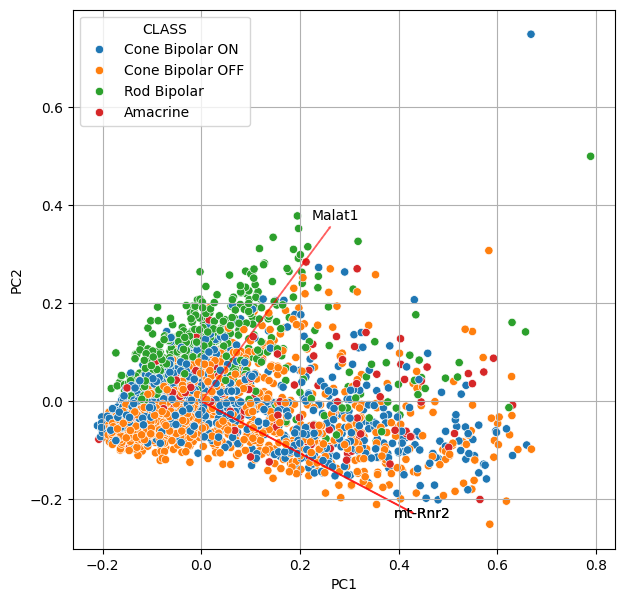

In [384]:
biplot(score, loadings)